CNN autoencoder
## convLSTM autoencoder?

$\textit{done}$ make time steps overlapping: seems a bit better!

$\textit{done}$ try id as binary instead of dec: much better!
double check that the reshaped matrices have data at correct places

3d (40 time steps) cnn better than cnn_lstm, try lstm after?
3d cnn performs better on 40 ts (40 is slightly different!) than 20 , test with binary cross entropy instead of mse, test 60 timesteps
more time steps pull normal and attack apart more, but I think this is because there are many consequtive attack packets in the data and in many cases longer time windows will simply contain more attack packets. 
## tune 3d cnn
## compare with straight forward lstm. keep getting NaN, exploding/vanishing gradients?
## just add ids as another feature normal lstm?
## convLSTM 
## bidirectional LSTM
## randomly pick boxes from entire dataset
batch normalization 
## batchnorm for convlstm
## add dropout? seems to improve cannolo test slightly
## add dense layer as output? seems to improve cannolo test slightly

## Prepare data

In [1]:
from matplotlib import pyplot 
import keras
import pickle
import tensorflow as tf
from keras.models import Model
from keras.models import Sequential
from keras.layers import Input
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import TimeDistributed 
from keras.layers import RepeatVector
from keras.layers import GRU
from keras.layers import Conv3D
from keras.layers import UpSampling3D
from keras.layers import MaxPool3D
from keras.layers import Conv2D
from keras.layers import UpSampling2D
from keras.layers import MaxPool2D
from keras.layers import Flatten
from keras.layers import Reshape
from keras.layers import GlobalAveragePooling2D
from keras.layers import Conv2DTranspose
from keras.layers import Conv3DTranspose
from keras.layers import BatchNormalization
from keras.layers import AveragePooling3D
from keras.layers import Activation
from keras.layers import ConvLSTM2D

from keras.utils import plot_model
from keras.callbacks import EarlyStopping
import numpy as np
import pandas as pd
from numpy import array

In [302]:
filename = 'dataframe_test_attack.csv'
df = pd.read_csv(filename, sep=',')
# allRows = df.shape[0]

In [304]:
import pandas as pd
import tensorflow as tf
import keras
import pickle
from keras.callbacks import EarlyStopping
import numpy as np
from cont_data_process import continuous_process
from prepare_data_cube_cont import make_cubes_cont
from prepare_LSTM_data import LSTM_data
from create_model import make_model

filename = 'dataframe_test_attack.csv'
df = pd.read_csv(filename, sep=',')
allRows = df.shape[0]

IDs = df['ID']
attack = df[df['Attack'] == 'Yes'].copy()
attack_ind = attack.index

dataValues = df.drop([ "ID", "Packet Deltatime", "Attack","Attack Window Number", "Normal Window Number"], axis = 1).copy()

dataValues = dataValues.to_numpy() 
print(dataValues.shape)
dataValues = dataValues[:148400]
n_steps = int(allRows/10000) # about 10k in each step #127 before
print(n_steps)
split = np.array_split(range(allRows), n_steps)


(148427, 64)
14


AttributeError: 'list' object has no attribute 'shape'

In [299]:
attack = df[df['Attack'] == 'Yes'].copy()
attack_ind = attack.index
print(attack_ind[0])

3021


In [2]:
filename = 'dataframe_training_new.zip'
df = pd.read_pickle(filename, compression='zip')
ID_vector = df['ID']

dataValues = df.drop([, "Attack", "ID", "Packet Deltatime", "Attack Window Number", "Normal Window Number"], axis = 1).copy()

dataValues = dataValues.to_numpy()

In [30]:
filename = 'dataframe_validation_attack.csv'
df = pd.read_csv(filename, sep=',')
allRows = df.shape[0]

IDs = df['ID']
attack = df[df['Attack'] == 'T'].copy()
attack_ind = attack.index

dataValues = df.drop([ "ID", "Packet Deltatime", "Attack","Attack Window Number", "Normal Window Number"], axis = 1).copy()

dataValues = dataValues.to_numpy() 


In [32]:
dataValues

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [ ]:
read_file = pd.read_pickle('normal_and_attack_data')
read_file.to_csv (r'normal_and_attack_data.csv', index=None)

In [337]:
read_file = pd.read_pickle('gear')



In [333]:
read_file['Dataset'].unique()

array(['train', 'valid', 'test'], dtype=object)

In [338]:
gear_train = read_file[read_file['Dataset'] == 'train'].copy()
gear_val = read_file[read_file['Dataset'] == 'valid'].copy()
gear_test = read_file[read_file['Dataset'] == 'test'].copy()

In [339]:
gear_train.to_csv(r'gear_train.csv',index=None)
gear_val.to_csv(r'gear_val.csv',index=None)
gear_test.to_csv(r'gear_test.csv',index=None)

In [342]:
g_train = gear_train.drop([ "Timestamp","ID", "Packet Deltatime", "Attack","Attack Window Number", "Normal Window Number","Total Time","Dataset"], axis = 1).copy()

In [12]:
filename = 'gear_test.csv'
df = pd.read_csv(filename, sep=',')

In [13]:
df.shape

(150000, 72)

In [ ]:
read_file.to_csv (r'normal_and_attack_data.csv', index=None)

In [23]:
filename = 'dataframe_validation_attack.zip'
df = pd.read_pickle(filename, compression='zip')
df.to_csv (r'dataframe_validation_attack.csv', index=None)

In [22]:
training_filename = 'dataframe_training_new.csv'
training_df = pd.read_csv(training_filename, sep=',')
allRowsTraining = training_df.shape[0]

training_IDs = training_df['ID']
#training_dataValues = training_df.drop(["Timestamp", "ID", "DLC", "Attack Window Number", "Normal Window Number", "Data1", "Data2", "Data3", "Data4", "Data5", "Data6", "Data7", "Data8","Total Time", "Attack", "Packet Deltatime"], axis = 1).copy()
training_dataValues = training_df.drop([ "ID", "Packet Deltatime", "Attack","Attack Window Number", "Normal Window Number","Total Time"], axis = 1).copy()

training_dataValues = training_dataValues.to_numpy() 

n_steps = int(allRowsTraining/10000) # about 10k in each step #127 before
print(n_steps)

49


In [19]:
dataValues = df.drop([ "ID", "Packet Deltatime", "Attack","Attack Window Number", "Normal Window Number","Total Time"], axis = 1).copy()


In [21]:
dataValues

bin0 bin1 bin2 bin3 bin4 bin5 bin6 bin7 bin8 bin9  ... bin54 bin55  \
494760    0    0    0    0    0    0    0    0    0    1  ...     0     1   
494761    0    0    0    0    0    0    0    0    0    0  ...     0     0   
494762    0    0    0    0    0    0    0    0    0    0  ...     0     1   
494763    0    0    0    0    0    0    0    0    0    0  ...     0     0   
494764    0    0    0    0    0    0    0    0    0    1  ...     0     1   
...     ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   ...   ...   
840860    0    0    0    0    0    0    0    0    0    0  ...     0     0   
840861    0    0    0    0    0    0    0    0    0    0  ...     0     0   
840862    0    0    0    0    0    0    0    0    0    0  ...     0     0   
840863    0    0    0    0    0    0    0    0    0    0  ...     0     0   
840864    0    0    0    0    0    0    0    0    0    0  ...     1     1   

       bin56 bin57 bin58 bin59 bin60 bin61 bin62 bin63  
494760     0     0     0     0     0     0     0     0  
494761     0     0     0     0     0     0     0     0  
494762     0     0     0     0     0     0     0     0  
494763     0     0     0     0     0     0     0     0  
494764     0     1     1     1     1     0     1     0  
...      ...   ...   ...   ...   ...   ...   ...   ...  
840860     0     0     0     0     0     0     0     0  
840861     0     0     0     0     0     0     0     0  
840862     0     1     1     1     1     0     1     0  
840863     0     0     0     0     0     0     0     0  
840864     0     0     1     0     1     0     0     0  

[346105 rows x 64 columns]

In [ ]:

# own data
nRows = 5000
n_timesteps = 40

filename = 'normal_and_attack_data.csv'
df = pd.read_csv(filename, nrows = nRows, sep=',')

#bin column names
bin_data_column_names = []
for j in range(64):
    bin_data_column_names.append('bin' + str(j))
    
# Få binärvärderna av de första 5 datapunkterna i en dataframe
temporary_df = df[bin_data_column_names]

# The values of these binary arrays
temporary_df_values = temporary_df.values

data = np.array(temporary_df_values)
data_with_attack = data.copy()
data = data[df['Attack'] == 'No']

IDs = df['ID']
AttackIDs = IDs.copy()
IDs = IDs[df['Attack'] == 'No']

from prepare_data_cube import make_cubes

#type = 'timeDist_cnn'
#type = 'cnn_lstm'
type = 'cnn'
x_test,x_train,xA,lastA,samples = make_cubes(IDs,AttackIDs,data,data_with_attack,n_timesteps,type)

ParserError: Error tokenizing data. C error: Expected 1 fields in line 6, saw 2


In [4]:
from data_processing import process
filename = 'gear_dataset.csv'

rows = 200  # no attack data in the first 1000 rows
#rows = 'slice'
data_with_attack, AttackIDs, labeled_data = process(filename,rows,no_attack_packets=False) 
print(f'including attack data: {data_with_attack.shape}')

data , IDs, _ = process(filename,rows,no_attack_packets=True)
print(f'normal data: {data.shape}')


number of attack packets in data set = 0
including attack data: (200, 64)
dropped 0 attack packets
normal data: (200, 64)


In [5]:
n_timesteps = 40
#labeled_data = df
labeled_data = labeled_data.reset_index(drop=True)

from prepare_data_cube import make_cubes

#type = 'timeDist_cnn'
type = 'cnn_lstm'
#type = 'cnn'
# x_test,x_train,xA,lastA,samples = make_cubes(IDs,AttackIDs,data,data_with_attack,n_timesteps,type)
x_test,x_train,samples = make_cubes(IDs,data,n_timesteps,type) # divide data

# attack = labeled_data[labeled_data['Attack'] == 'T'].copy()
# attack_ind = attack.index
# attack_ind = attack_ind[attack_ind<=lastA]
# attack_samples = np.floor(attack_ind/n_timesteps)
# attack_samples = np.unique( attack_samples) # all samples that contain attack packets
# attack_samples = attack_samples.astype(int)

x_test shape = (2, 64, 17, 40), x_train shape = (3, 64, 17, 40)


In [42]:

    attack = labeled_data[labeled_data['Attack'] == 'T'].copy()
    attack_ind = attack.index
    attack_ind = attack_ind[attack_ind<=lastA]

    contains_attack = [np.any(np.in1d(x, attack_ind)) for x in samples]
    attack_samples = xA[contains_attack]
   
    #attack_samples = np.unique( attack_samples) # all samples that contain attack packets
    #attack_samples = attack_samples.astype(int)

[False]
[ True]
[[[[[0.]
    [0.]
    [0.]
    ...
    [0.]
    [0.]
    [0.]]

   [[0.]
    [0.]
    [0.]
    ...
    [0.]
    [0.]
    [0.]]

   [[0.]
    [0.]
    [0.]
    ...
    [0.]
    [0.]
    [0.]]

   ...

   [[1.]
    [0.]
    [0.]
    ...
    [0.]
    [0.]
    [0.]]

   [[0.]
    [0.]
    [0.]
    ...
    [0.]
    [0.]
    [0.]]

   [[0.]
    [0.]
    [0.]
    ...
    [0.]
    [0.]
    [0.]]]


  [[[0.]
    [0.]
    [0.]
    ...
    [0.]
    [0.]
    [0.]]

   [[0.]
    [0.]
    [0.]
    ...
    [0.]
    [0.]
    [0.]]

   [[0.]
    [0.]
    [0.]
    ...
    [0.]
    [0.]
    [0.]]

   ...

   [[0.]
    [0.]
    [0.]
    ...
    [0.]
    [0.]
    [0.]]

   [[0.]
    [0.]
    [0.]
    ...
    [0.]
    [0.]
    [0.]]

   [[0.]
    [0.]
    [0.]
    ...
    [0.]
    [0.]
    [0.]]]


  [[[0.]
    [0.]
    [0.]
    ...
    [0.]
    [0.]
    [0.]]

   [[0.]
    [0.]
    [0.]
    ...
    [0.]
    [0.]
    [0.]]

   [[0.]
    [0.]
    [0.]
    ...
    [0.]
    [0.]
    [0.]]

   .

## Build network

best value so far on lstm tuning: 
uniformMin = -0.89
uniformMax = 0.07
lstmUnits = 491
denseUnits = 2060
dropout = 0.3
learning_rate = 0.001
tuner/epochs = 2
tuner/initial_e... = 0
tuner/bracket = 4
tuner/round = 0


In [12]:
# cnn
# channels?? 2d or 3d? think 3d because there are correlations between the two cannels
# relu much better than sigmoid
n_features = 64
depth = 2

input = Input(shape=(n_timesteps,n_features,depth, 1))

x = Conv3D(filters = 60, kernel_size = (2, 2, 1), activation='relu', padding='same')(input) 
x = Conv3D(filters = 60, kernel_size = (2, 2, 1), activation='relu', padding='same')(x)
#x = MaxPool3D((2,2,2),padding='valid')(x)

x = Conv3D(filters = 60, kernel_size = (2, 2, 1), activation='relu', padding='same')(x)
#x = UpSampling3D(size=(2, 2, 2))(x)

x = Conv3D(filters = 1, kernel_size = (2, 2, 1), activation='relu', padding='same')(x)

CNN = Model(inputs=input, outputs=x,name="CNN")
CNN.compile(optimizer='adam', loss='mse')
CNN.summary()


Model: "CNN"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 40, 64, 2, 1)]    0         
_________________________________________________________________
conv3d (Conv3D)              (None, 40, 64, 2, 60)     300       
_________________________________________________________________
conv3d_1 (Conv3D)            (None, 40, 64, 2, 60)     14460     
_________________________________________________________________
conv3d_2 (Conv3D)            (None, 40, 64, 2, 60)     14460     
_________________________________________________________________
conv3d_3 (Conv3D)            (None, 40, 64, 2, 1)      241       
Total params: 29,461
Trainable params: 29,461
Non-trainable params: 0
_________________________________________________________________


TensorShape([None, 40, 64, 2, 1])

In [ ]:

import time

#model = CNN
es = EarlyStopping(monitor='val_loss', mode='min', verbose=0, patience=10)

s = time.time()

history = model.fit(x_train,x_train, validation_data=(x_test, x_test), epochs=300, verbose=0, shuffle=False, callbacks = [es])

e = time.time()

# plot history
pyplot.plot(history.history['loss'], label = 'train')
pyplot.plot(history.history['val_loss'], label = 'validation')

pyplot.legend()
pyplot.show()
print(f'training time = {e-s} seconds')



In [ ]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=0, patience=10)

checkpoint_filepath = '/tmp/checkpoint'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=False,
    monitor='val_loss',
    mode='min',
    save_best_only=True)

model.fit(x_train,x_train, validation_data=(x_test, x_test), epochs=3, verbose=0, shuffle=False, callbacks = [es,model_checkpoint_callback])


input = Input(shape=(n_timesteps,n_features,n_channels, 1))

    *l1 = Conv3D(filters = 60, kernel_size = (2, 2, 2), activation='relu', padding='same')(input) * these are changed, kernel size and filters
    *l2 = Conv3D(filters = 60, kernel_size = (2, 2, 2), activation='relu', padding='same')(l1)
#l3 = MaxPool3D((2,2,2),padding='valid')(l2)
    *l4 = Conv3D(filters = 60, kernel_size = (2, 2, 2), activation='relu', padding='same')(l2)
    l5 = Conv3D(filters = 1, kernel_size = (2, 2, 2), activation='relu', padding='same')(l4) only change kernel size here
all using nrows = 1000, patience = 10, epochs = 300 

kernel in third dim must be smaller than input to be able to establish correlations in this dim.

loss: 120.9649 - val_loss: 235.5185 for kernel = 3,3,1, 16 filters    
loss: 76.3744 - val_loss: 161.5475 for kernel = 3,3,3, 16 filters  
loss: 6.2998 - val_loss: 7.3455 for kernel = 2, 2, 2, 60 filters  
loss: 24 - val_loss: 21.1457 for kernel = 2, 2, 2, 80 filters  
loss: 3.4384 - val_loss: 4.4540 for kernel = 2, 2, 1, 60 filters
loss: 8.4616 - val_loss: 604.7426 for kernel = 10, 2, 1, 60 filters (training time = 2193.382426261902 seconds) 

using nrows = 10000:
early stopping: Epoch 218/300: loss: 0.7777 - val_loss: 0.7862 (best around epoch 208:loss: 0.4987 - val_loss: 0.4804) for kernel = 2, 2, 1, 60 filters 40 timesteps!

In [ ]:
attack_samples.shape

In [66]:
input = Input(shape=(64,17,40,1))

x = TimeDistributed(Conv2D(filters = 5, kernel_size = (21, 11), activation='relu', padding='same'))(input) 
x = TimeDistributed(MaxPool2D((2,2),padding='valid'))(x)

x = TimeDistributed(Conv2D(filters = 5, kernel_size = (11, 3), padding='same'))(x)
x = TimeDistributed(BatchNormalization())(x)
x = TimeDistributed(Activation('relu'))(x)
x = TimeDistributed(MaxPool2D((2,2)))(x)

x = Reshape((40,-1))(x)
x = LSTM(64,return_sequences = True)(x)
x,h,c = LSTM(64,return_sequences = True,return_state=True)(x)
x = LSTM(64,return_sequences = True)(x,initial_state=[h,c])
x = LSTM(128, return_sequences = True)(x)

x = TimeDistributed(Reshape((64,2,1)))(x)
x = TimeDistributed(Conv2DTranspose(filters = 5, kernel_size = (1, 5), activation='relu', padding='valid',strides=(1,1)))(x)
x = TimeDistributed(Conv2DTranspose(filters = 5, kernel_size = (1, 12), activation='relu', padding='valid',strides=(1,1)))(x)
x = Permute((2,3,1,4))(x)
x = TimeDistributed(Dense(1,activation='sigmoid'))(x)

CNN = Model(inputs=input, outputs=x,name="CNN")
CNN.compile(optimizer='adam', loss='BinaryCrossentropy')
CNN.summary()

model = CNN # test with attack included

CNN = model
from matplotlib import pyplot as plt  

if type == 'timeDist_cnn' or type == 'cnn':
    attack_cubes = xA[attack_samples,:,:,:,:]

if type == 'cnn_lstm':
    attack_cubes = xA[attack_samples,:,:,:]

x_test = x_train
yHat_normal = CNN.predict(x_test) # only normal packets
normal_errors = x_test-yHat_normal
print(yHat_normal.shape)
normal_errors = normal_errors.flatten()
normal_errors = np.abs(normal_errors)
normal_errors = np.mean(normal_errors)
print(f'normal: {normal_errors}')


# yHat_attack = CNN.predict(xA) # normal and attack packets
# attack_errors = xA-yHat_attack
# print(yHat_attack.shape)
# attack_errors = attack_errors.flatten()
# attack_errors = np.abs(attack_errors)
# attack_errors = np.mean(attack_errors)
# print(f'normal and attack: {attack_errors}')

yHat_true_attack = CNN.predict(attack_cubes) # only attack packets
true_attack_errors = attack_cubes-yHat_true_attack
print(yHat_true_attack.shape)
true_attack_errors = true_attack_errors.flatten()
true_attack_errors = np.abs(true_attack_errors)
true_attack_errors = np.mean(true_attack_errors)
print(f'only attack: {true_attack_errors}')


# get average for each sample cube 
normal_errors = x_test-yHat_normal

if type == normal_LSTM:
     normal_errors = normal_errors.reshape(normal_errors.shape[0],normal_errors.shape[1]*normal_errors.shape[2])


if type == 'timeDist_cnn' or type == 'cnn':
    normal_errors = normal_errors.reshape(normal_errors.shape[0],normal_errors.shape[1]*normal_errors.shape[2]*normal_errors.shape[3]*normal_errors.shape[4])

if type == 'cnn_lstm':
    normal_errors = normal_errors.reshape(normal_errors.shape[0],normal_errors.shape[1]*normal_errors.shape[2]*normal_errors.shape[3])

    
normal_errors = np.abs(normal_errors)
normal_errors = np.sum(normal_errors,axis=1)
#normal_errors = normal_errors/normal_errors.shape[0]
print(normal_errors.shape)

# attack_errors = xA-yHat_attack
# if type == 'timeDist_cnn' or type == 'cnn':
#     attack_errors = attack_errors.reshape(attack_errors.shape[0],attack_errors.shape[1]*attack_errors.shape[2]*attack_errors.shape[3]*attack_errors.shape[4])

# if type == 'cnn_lstm':
#     attack_errors = attack_errors.reshape(attack_errors.shape[0],attack_errors.shape[1]*attack_errors.shape[2]*attack_errors.shape[3])

# attack_errors = np.abs(attack_errors)
# attack_errors = np.sum(attack_errors,axis=1)
# #attack_errors = attack_errors/attack_errors.shape[0]
# print(attack_errors.shape)

true_attack_errors = attack_cubes-yHat_true_attack

if type == normal_LSTM:
    true_attack_errors = true_attack_errors.reshape(true_attack_errors.shape[0],true_attack_errors.shape[1]*true_attack_errors.shape[2])

if type == 'timeDist_cnn' or type =='cnn':
    true_attack_errors = true_attack_errors.reshape(true_attack_errors.shape[0],true_attack_errors.shape[1]*true_attack_errors.shape[2]*true_attack_errors.shape[3] *true_attack_errors.shape[4])

if type == 'cnn_lstm':
    true_attack_errors = true_attack_errors.reshape(true_attack_errors.shape[0],true_attack_errors.shape[1]*true_attack_errors.shape[2]*true_attack_errors.shape[3])

true_attack_errors = np.abs(true_attack_errors)
true_attack_errors = np.sum(true_attack_errors,axis=1)
#attack_errors = attack_errors/attack_errors.shape[0]
print(true_attack_errors.shape)

plt.figure()
plt.boxplot([normal_errors,true_attack_errors]) 
plt.xticks([1,2], ['Normal','Attack'], rotation='vertical', fontsize=14)
plt.ylabel('Error Sum Per Cube', fontsize=14)
plt.title('Gear Dataset, trained on all normal data\nFeedforward AutoEncoder', fontsize=16)

maxNormal = np.max(normal_errors) + 0.01*np.max(normal_errors)
minAttack = np.min(true_attack_errors) - 0.01*np.max(normal_errors)

plt.figure()
#plt.scatter(np.arange(len(attack_errors)),attack_errors,c='y')
plt.scatter(np.arange(len(normal_errors)), normal_errors,c='b',s=10 )
plt.scatter(np.arange(len(true_attack_errors)), true_attack_errors,c='r')
plt.axhline(y=maxNormal, color='k', linestyle='-')
plt.axhline(y=minAttack, color='k', linestyle='--')



NameError: name 'Permute' is not defined

In [ ]:
print(np.min(true_attack_errors))
print(np.max(normal_errors))


In [ ]:
maxNormal = np.max(normal_errors) + 0.001*np.max(normal_errors)


plt.figure()
#plt.scatter(np.arange(len(attack_errors)),attack_errors,c='y')
plt.scatter(np.arange(len(normal_errors)), normal_errors,c='b',s=1 )
plt.scatter(np.arange(len(true_attack_errors)), true_attack_errors,c='r',s=1)
plt.axhline(y=maxNormal, color='k', linestyle='-')
#plt.axhline(y=minAttack, color='k', linestyle='--')

In [ ]:
maxNormal = np.max(normal_errors) + 0.001*np.max(normal_errors)

false_normal = true_attack_errors[true_attack_errors<maxNormal]
n_false_normal = len(false_normal)
print(n_false_normal)
print(1-n_false_normal/len(true_attack_errors))
print(len(true_attack_errors))

#3 wrong, 0.996 acc 
#Regarding the CNN, the accuracy on 50 000 time steps where there are 9665 attack packets is 0.996 if I put the threshold 

In [ ]:
#cnn

input = Input(shape=(x_train.shape[1],x_train.shape[2],x_train.shape[3], 1))

x = Conv3D(filters = 60, kernel_size = (2, 2, 2), strides=(2, 2, 2), activation='relu', padding='same')(input) 
x = MaxPool3D((2,2,2),padding='same')(x)

x = Conv3D(filters = 30, kernel_size = (2, 2, 2), strides=(1, 1, 1), activation='relu', padding='same')(x)
x = MaxPool3D((1,2,2),padding='same')(x)

# x = Conv3D(filters = 60, kernel_size = (2, 2, 2), strides=(1, 1, 1), activation='relu', padding='same')(x)
# x = UpSampling3D(size=(2,2,2))(x)

# x = Conv3D(filters = 1, kernel_size = (2, 2, 1), strides=(2, 2, 1), activation='relu', padding='same')(x)
# x = UpSampling3D(size=(2,2,2))(x)

# x = Conv3D(filters = 60, kernel_size = (2, 2, 1), strides=(2, 2, 1), activation='relu', padding='same')(x)
#x = UpSampling3D(size=(2,2,1))(x)
#x = UpSampling3D(size=(2,2,1))(x)
x = Conv3DTranspose(60,kernel_size=(1,2,2), strides=(2, 2, 2))(x)
x = Conv3D(filters = 1, kernel_size = (2, 2, 2), strides=(1, 1, 3), activation='relu', padding='same')(x)

x = Conv3DTranspose(60,kernel_size=(2,2,2), strides=(2, 2, 17))(x)
#x = Conv3D(filters = 30, kernel_size = (2, 2, 2), strides=(1, 6, 1), activation='relu', padding='same')(x)

#x = Conv3DTranspose(30,kernel_size=(2,2,2), strides=(2, 2, 2))(x)
x = Conv3DTranspose(20,kernel_size=(1,2,2), strides=(1, 2, 2))(x)



x = Conv3D(filters = 1, kernel_size = (1, 2, 2), strides=(1, 1, 4), activation='relu', padding='same')(x)
#x = tf.squeeze(x,[0,4])
# x = tf.squeeze(x,4)
# x = Reshape((x.shape[1]*x.shape[2],x.shape[3]))(x)
# x = LSTM(100,return_sequences=True,return_state=False)(x) # put lstm model as a separate model after? 
# x = LSTM(50,return_sequences=True)(x)
# x = LSTM(17,return_sequences=True)(x)

# x = tf.expand_dims(x,-1)
# x = Reshape((x_train.shape[1],x_train.shape[2],x_train.shape[3], 1))(x)

#x = Conv3D(filters = 1, kernel_size = (1, 1, 1), strides=(1, 1, 1), activation='relu', padding='same')(x)

CNN = Model(inputs=input, outputs=x,name="CNN")
CNN.compile(optimizer='adam', loss='mse')
CNN.summary()

model = CNN

In [ ]:
x_train.shape

In [ ]:
# cnn_lstm
# Combine 2d CNN and LSTM
# could do 2d CNN and have each timestep as one channel! trained for 1500 but needs more
n_timesteps = 20
input = Input(shape=(x_train.shape[1],x_train.shape[2],x_train.shape[3]))

x = Conv2D(filters = 60, kernel_size = (4, 4), activation='relu', padding='same')(input) 
x = MaxPool2D((2,2),padding='valid')(x)

x = Conv2D(filters = n_timesteps, kernel_size = (2, 2), activation='relu', padding='same')(x)
x = MaxPool2D((2, 2))(x)

#x = Conv2D(filters = n_timesteps, kernel_size = (2, 1), activation='relu', padding='same')(x)
#x = MaxPool2D((2, 2))(x)

# x = Conv2D(filters = n_timesteps, kernel_size = (2, 1), activation='relu', padding='same')(x)
# x = MaxPool2D((2, 1))(x)

# x = Conv2D(filters = n_timesteps, kernel_size = (2, 1), activation='relu', padding='same')(x)
# x = MaxPool2D((2, 1))(x)

# x = Conv2D(filters = n_timesteps, kernel_size = (2, 1), activation='relu', padding='same')(x)
# x = MaxPool2D((2, 2))(x)
print(x.shape)
x = Reshape((n_timesteps,x.shape[1]*x.shape[2]))(x)
# # LSTM [samples,timesteps,features]
# x = LSTM(64,return_sequences = True)(x)
# x = LSTM(128, return_sequences = True)(x)

# x = Reshape((64,2,n_timesteps,))(x)
# x = Conv2D(filters = 20, kernel_size = (1, 1), activation='relu', padding='same')(x)
# x =  UpSampling2D((1, 17))(x)
# x = Reshape((64,17,n_timesteps))(x)



CNN = Model(inputs=input, outputs=x,name="CNN")
CNN.compile(optimizer='adam', loss='mse')
CNN.summary()
model = CNN


In [ ]:
CNN.save('CNN_LSTM_trained_on_50000_nonattack')

In [ ]:
x_train.shape

In [10]:
# timeDist_cnn
# maybe x_train needs to be time:samples:etc
n_filters = 5
denseUnits = n_filters* 32
x_train.shape[3]
model = Sequential()
n_features = 64
model.add(
    TimeDistributed(
        Conv2D(1, (2,1), activation='relu',padding='same'), 
        input_shape=(x_train.shape[1], x_train.shape[2], x_train.shape[3]
, 1) # 5 images...
    )
)
model.add(
    TimeDistributed(
        Conv2D(n_filters, (2,1), activation='relu',padding='same')
    )
)

model.add(
    TimeDistributed(
        MaxPool2D((2, 2),padding='same')
    )
)

model.add(
    Reshape((n_timesteps,-1)))

model.add(
   LSTM(128, activation='relu', return_sequences=True)
)

model.add(
   LSTM(10, activation='relu', return_sequences=True)
)

model.add(
   LSTM(128, activation='relu', return_sequences=True)
)

model.add(
    TimeDistributed(
        Dense(denseUnits)
    )
)

model.add(
    Reshape((n_timesteps,32,1,n_filters)))

model.add(
    TimeDistributed(
        UpSampling2D((2,17))
    )
)

model.add(
    TimeDistributed(
        Conv2D(1, (1,1), activation='relu',padding='same')
    )
)

model.compile('adam', loss='KLDivergence')

model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
time_distributed_28 (TimeDis (None, 40, 64, 17, 1)     3         
_________________________________________________________________
time_distributed_29 (TimeDis (None, 40, 64, 17, 5)     15        
_________________________________________________________________
time_distributed_30 (TimeDis (None, 40, 32, 9, 5)      0         
_________________________________________________________________
reshape_10 (Reshape)         (None, 40, 1440)          0         
_________________________________________________________________
lstm_15 (LSTM)               (None, 40, 128)           803328    
_________________________________________________________________
lstm_16 (LSTM)               (None, 40, 10)            5560      
_________________________________________________________________
lstm_17 (LSTM)               (None, 40, 128)          

In [ ]:
#alternative 3d cnn (works very well!)
# larger kernels initially to capture bigger features
input = Input(shape=(x_train.shape[1],x_train.shape[2],x_train.shape[3], 1))

x = Conv3D(filters = 60, kernel_size = (11, 11, 11), strides=(1, 1, 1), activation='relu', padding='same')(input) 
x = MaxPool3D((2,2,2),padding='same')(x)

x = Conv3D(filters = 10, kernel_size = (9, 9, 3), strides=(1, 1, 1), activation='relu', padding='same')(x)
x = MaxPool3D((1,2,2),padding='same')(x)

x = Conv3D(filters = 5, kernel_size = (3, 3, 3), strides=(1, 1, 1), activation='relu', padding='same')(x)
x = MaxPool3D((2,2,2),padding='same')(x)

x = Conv3DTranspose(5,kernel_size=(3,3,3), strides=(1, 1, 1))(x)

x = Conv3DTranspose(10,kernel_size=(9,9,3), strides=(1, 1, 1))(x)

x = Conv3DTranspose(10,kernel_size=(11,11,11), strides=(1, 1, 1))(x)
x = Conv3DTranspose(1,kernel_size=(11,37,1), strides=(1, 1, 1))(x)

CNN = Model(inputs=input, outputs=x,name="CNN")
CNN.compile(optimizer='adam', loss='mse')
CNN.summary()

model = CNN

In [ ]:
from keras.layers import AveragePooling3D

In [ ]:
    input = Input(shape=(x_train.shape[1],x_train.shape[2],x_train.shape[3], 1))

    x = Conv3D(filters = 5, kernel_size = (40, 40, 40), strides=(1, 1, 1), activation='relu', padding='same')(input) 
    x = AveragePooling3D((2,2,2),padding='same')(x)

    x = Conv3D(filters = 5, kernel_size = (21, 21, 21), strides=(1, 1, 1), activation='relu', padding='same')(x) 
    x = AveragePooling3D((2,2,2),padding='same')(x)

    x = Conv3D(filters = 3, kernel_size = (11, 11, 11), strides=(1, 1, 1), activation='relu', padding='same')(x) 


    x = Conv3DTranspose(1,kernel_size=(9,9,3), strides=(1, 1, 1))(x)

    x = Conv3DTranspose(1,kernel_size=(11,11,11), strides=(1, 1, 1))(x)

    k1 = x_train.shape[1] - x.shape[1] + 1
    k2 = x_train.shape[2] - x.shape[2] + 1
    k3 = x_train.shape[3] - x.shape[3] + 1 

    x = Conv3DTranspose(1,kernel_size=(k1,k2,k3), strides=(1, 1, 1))(x) # this should work always as long as strides are 1,1,1

    CNN = Model(inputs=input, outputs=x,name="CNN")
    CNN.compile(optimizer='adam', loss='BinaryCrossentropy')
    CNN.summary()

    model = CNN

Text(0.5, 0, 'Sample number')

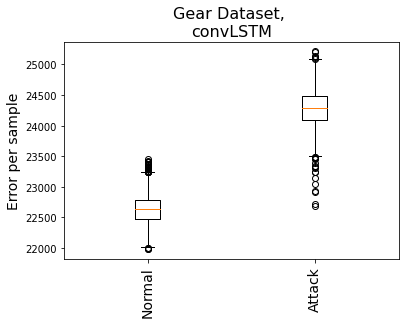

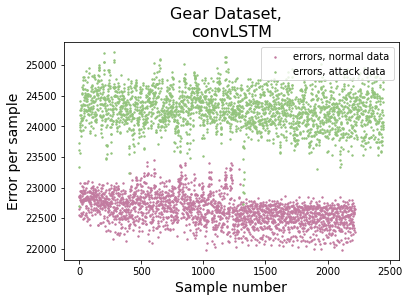

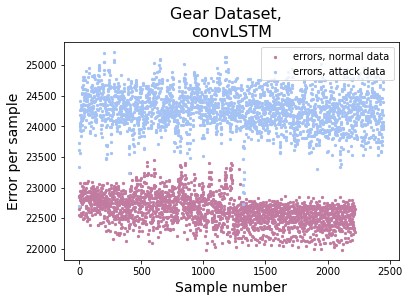

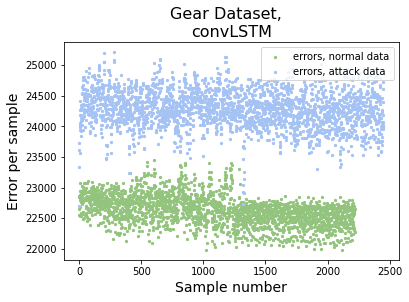

In [2]:
from matplotlib import pyplot as plt  
f = open('normal_errors.pckl', 'rb')
normal_errors = pickle.load(f)
f.close()

f = open('attack_errors.pckl', 'rb')
true_attack_errors = pickle.load(f)
f.close()

plt.figure()
plt.boxplot([normal_errors,true_attack_errors]) 
plt.xticks([1,2], ['Normal','Attack'], rotation='vertical', fontsize=14)
plt.ylabel('Error per sample', fontsize=14)
plt.title('Gear Dataset, \nconvLSTM', fontsize=16)

#maxNormal = np.max(normal_errors) + 0.001*np.max(normal_errors)
minAttack = np.min(true_attack_errors) - 0.01*np.max(normal_errors)
#maxNormal1 = optimal_threshold
#maxNormal2 = thresholds[best_threshold_location]

plt.figure()
#plt.scatter(np.arange(len(attack_errors)),attack_errors,c='y')
plt.scatter(np.arange(len(normal_errors)), normal_errors,c='#c27ba0ff',s=2, alpha=1 )
plt.scatter(np.arange(len(true_attack_errors)), true_attack_errors,c='#93c47dff',s=2, alpha=1)
plt.legend(['errors, normal data', 'errors, attack data'])
#plt.axis([-1000,27000,-10,250])
plt.title('Gear Dataset,  \nconvLSTM', fontsize=16)
plt.ylabel('Error per sample', fontsize=14)
plt.xlabel('Sample number', fontsize=14)


plt.figure()
#plt.scatter(np.arange(len(attack_errors)),attack_errors,c='y')
plt.scatter(np.arange(len(normal_errors)), normal_errors,c='#c27ba0ff',s=5, alpha=1 )
plt.scatter(np.arange(len(true_attack_errors)), true_attack_errors,c='#a4c2f4ff',s=5, alpha=1)
plt.legend(['errors, normal data', 'errors, attack data'])
#plt.axis([-1000,27000,-10,250])
plt.title('Gear Dataset,  \nconvLSTM', fontsize=16)
plt.ylabel('Error per sample', fontsize=14)
plt.xlabel('Sample number', fontsize=14)
#plt.axhline(y=maxNormal1, color='k', linestyle='-')
#plt.axhline(y=maxNormal2, color='k', linestyle='--')

plt.figure()
#plt.scatter(np.arange(len(attack_errors)),attack_errors,c='y')
plt.scatter(np.arange(len(normal_errors)), normal_errors,c='#93c47dff',s=5, alpha=1 )
plt.scatter(np.arange(len(true_attack_errors)), true_attack_errors,c='#a4c2f4ff',s=5, alpha=1)
plt.legend(['errors, normal data', 'errors, attack data'])
#plt.axis([-1000,27000,-10,250])
plt.title('Gear Dataset,  \nconvLSTM', fontsize=16)
plt.ylabel('Error per sample', fontsize=14)
plt.xlabel('Sample number', fontsize=14)

In [33]:
from matplotlib import pyplot as plt  
# normal = 'normal_errors_3dCNN_val_gear_FINAL.pckl'
# attack = 'attack_errors_3dCNN_val_gear_FINAL.pckl'

# normal = 'normal_errors_TimedistCNN_val_gear_FINAL.pckl'
# attack = 'attack_errors_TimedistCNN_val_gear_FINAL.pckl'


# normal = 'normal_errors_panic2dcnn.pckl'
# attack = 'attack_errors_panic2dcnn.pckl'

# normal = 'normal_errors_2dcnnlstm_val_gear_FINAL.pckl'
# attack = 'attack_errors_2dcnnlstm_val_gear_FINAL.pckl'

# attack = '3dcnnattack.pckl'
# normal = '3dcnnnormal.pckl'

# normal = 'normal_errors_ConvLSTM_val_gear_FINAL.pckl'
# attack = 'attack_errors_ConvLSTM_val_gear_FINAL.pckl'

# normal = 'normal_errors_3dCNN_val.pckl'
# attack = 'attack_errors_3dCNN_val.pckl'

# attack = 'attack_errors_2dcnnlstm_val.pckl'
# normal = 'normal_errors_2dcnnlstm_val.pckl'

# attack = 'attack_errors_timedistcnnlstm_val.pckl'
# normal = 'normal_errors_timedistcnnlstm_val.pckl'

# normal = 'normal_errors_bi_convLSTM_val.pckl'
# attack = 'attack_errors_bi_convLSTM_val.pckl'

normal = 'normal_errors_convLSTM_val.pckl'
attack = 'attack_errors_convLSTM_val.pckl'

#normal = '3dsnnnewnew_normal_gear.pckl'
#attack = '3dsnnnewnew_attack_gear.pckl'

# normal = 'normal_errors_newnewconv-lstm_val_gear_FINAL.pckl'

# attack = 'attack_errors_newnewconv-lstm_val_gear_FINAL.pckl'






# normal = 'normal_errors_smalllstm-06-18_gear.pckl'
# attack ='attack_errors_smalllstm-06-18.pckl'
max_error = 64*40*17

# normal = 'normal_errors_smallLSTM_val.pckl'
# attack = 'attack_errors_smallLSTM_val.pckl'

# normal = 'normal_errors_cannoloLSTM_val.pckl'
# attack = 'attack_errors_cannoloLSTM_val.pckl'
# max_error = 64*40

f = open(normal, 'rb')
normal_errors = pickle.load(f)
f.close()

f = open(attack, 'rb')
attack_errors = pickle.load(f)
f.close()

normal_errors = np.array(normal_errors)
normal_errors = np.concatenate(normal_errors, axis=0 )
normal_errors = normal_errors/max_error

attack_errors = np.array(attack_errors)
attack_errors = np.concatenate(attack_errors, axis=0 )
attack_errors = attack_errors/max_error


Text(0.5, 0, 'Sample number')

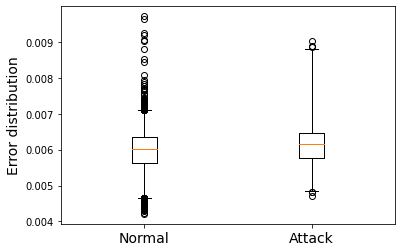

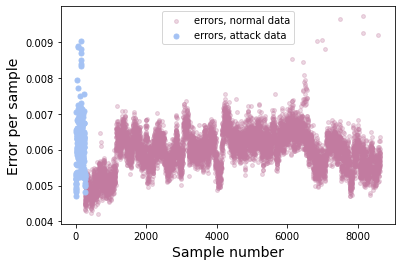

In [34]:

plt.ylabel('Error distribution', fontsize = 14)
#plt.title('Gear Dataset')
plt.boxplot([normal_errors, attack_errors],
            whis=(1,99) ) 
plt.xticks([1,2], ['Normal','Attack'], rotation='horizontal', fontsize = 14)

 

#%% #Ellen code 
plt.figure()
#plt.scatter(np.arange(len(attack_errors)),attack_errors,c='y')
plt.scatter(np.arange(len(attack_errors),len(normal_errors)+len(attack_errors)), normal_errors,c='#c27ba0ff',s=15, alpha=0.3 )
plt.scatter(np.arange(len(attack_errors)), attack_errors,c='#a4c2f4ff',s=25, alpha=1 )
plt.legend(['errors, normal data', 'errors, attack data'])
#plt.axis([-1000,27000,-10,250])
#plt.title('Gear Dataset,  \nconvLSTM', fontsize=16)
plt.ylabel('Error per sample', fontsize=14)
plt.xlabel('Sample number', fontsize=14)

#plt.axhline(y=v1, color='k', linestyle='-')


In [126]:
np.arange(len(attack_errors),len(normal_errors)+len(attack_errors))

array([ 2061,  2062,  2063, ..., 69017, 69018, 69019])

In [376]:
f = open('pred_labels_test.pckl', 'rb')
predicted_labels_CNN = pickle.load(f)
f.close()

In [12]:
#errors = 'test_errors_2dcnn_lstm.pckl'
errors = 'test_errors_panic2dcnn.pckl'


f = open(errors, 'rb')
all_errors = pickle.load(f)
f.close()



all_errors = np.array(all_errors)
all_errors = np.concatenate(all_errors, axis=0 )
all_errors = all_errors/max_error

predicted_normal = all_errors[all_errors < v1]
predicted_attack = all_errors[all_errors > v1]


In [13]:
#samples = 'all_attack_samples_2d_cnn_test.pckl'
# attack = 'attack_errors_cannoloLSTM_val.pckl'
samples = 'all_attack_samples_panic2dcnntest.pckl'

f = open(samples, 'rb')
attack_samples = pickle.load(f)
f.close()

attack_samples = np.array(attack_samples)
attack_samples = np.concatenate(attack_samples, axis=0 )
print(attack_samples.shape)

true_attack = all_errors[attack_samples]
true_labels = attack_samples.astype(int).copy()
predicted_labels = all_errors > v1
predicted_labels = predicted_labels.astype(int)



(3750,)


In [10]:
np.sum(predicted_labels == true_labels)

4162

In [356]:
test = np.ones((len(predicted_labels)))
print(test)

[1. 1. 1. ... 1. 1. 1.]


In [377]:
predicted_labels_CNN[predicted_labels_CNN == 1] = -1
predicted_labels_CNN[predicted_labels_CNN== 0 ] = 1

In [374]:
# OR
predicted_labels_combined = np.ones(len(true_labels))

for i in range(len(true_labels)):
    branch1 = predicted_labels_OCSVM[i]
    branch2 = predicted_labels_CNN[i]
    if branch1 == -1 :
            predicted_labels_combined[i] = -1
    elif branch2 == -1:
            predicted_labels_combined[i] = -1
print(predicted_labels_combined)



[1. 1. 1. ... 1. 1. 1.]


In [373]:
# AND
predicted_labels_combined = np.ones(len(true_labels))

for i in range(len(true_labels)):
    branch1 = predicted_labels_OCSVM[i]
    branch2 = predicted_labels_CNN[i]
    if branch1 == -1 :
            if branch2 == -1:
                predicted_labels_combined[i] = -1
print(predicted_labels_combined)

[1. 1. 1. ... 1. 1. 1.]


In [14]:
f = open('pred_labels_test_gear.pckl', 'wb')
pickle.dump(predicted_labels, f)
f.close()

In [308]:
f = open('true_labels_test.pckl', 'wb')
pickle.dump(true_labels, f)
f.close()

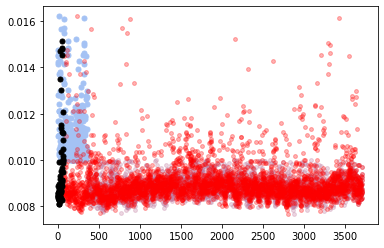

In [226]:
plt.scatter(np.arange(len(predicted_attack),len(predicted_normal)+len(predicted_attack)), predicted_normal,c='#c27ba0ff',s=15, alpha=0.3 )
plt.scatter(np.arange(len(predicted_attack)), predicted_attack,c='#a4c2f4ff',s=25, alpha=1 )

plt.scatter(np.arange(len(true_attack),len(true_normal)+len(true_attack)), true_normal,c='r',s=15, alpha=0.3 )
plt.scatter(np.arange(len(true_attack)), true_attack,c='k',s=25, alpha=1 )

In [15]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score

In [16]:
tn, fp, fn, tp = confusion_matrix(true_labels, predicted_labels).ravel()
    
tpr_test = recall_score(true_labels, predicted_labels)

fpr_test = fp / (fp + tn)

tpr = tp/(tp+fn) 

accuracy = accuracy_score(true_labels, predicted_labels)
a = (tp + tn)/(tp+tn+fp+fn)   

print(f'tpr_test: {tpr_test}, fpr: {fpr_test}. accuracy: {accuracy}')    
#auc_test_ocsvm = \
   # roc_auc_score(y_test_mixed_ocsvm, y_pred_test_ocsvm)

tpr_test: 0.9824912456228114, fpr: 0.043403769274700174. accuracy: 0.9704


In [16]:
predicted_labels.shape

(4275,)

In [18]:
#maxNormal = np.max(normal_errors) - 0.1*np.max(normal_errors)

maxNormal = v1
#maxNormal2 = v2

false_negative = attack_errors[attack_errors<=maxNormal]
false_negative = len(false_negative)
false_positive = normal_errors[normal_errors>maxNormal]
false_positive = len(false_positive)

true_positive = len(attack_errors[attack_errors>maxNormal])
true_negative =  len(normal_errors[normal_errors<=maxNormal])
print(true_positive + true_negative + false_positive + false_negative)
all = len(attack_errors) + len(normal_errors)
print(all)
#false = n_false_normal+n_false_positive
print(f'false negative {false_negative}, false positive {false_positive}')
#print(1-false/all)

acc = (true_positive + true_negative)/all
tpr = true_positive/(true_positive + false_negative)
fpr = false_positive/(false_positive + true_negative)
# false_normal = attack_errors[attack_errors<maxNormal2]
# n_false_normal = len(false_normal)
# false_attack = normal_errors[normal_errors>maxNormal2]
# n_false_attack = len(false_attack)

#print(f'false negative {n_false_normal}, false positive {n_false_attack}')
#print(1-(n_false_normal+n_false_attack)/(len(attack_errors) + len(normal_errors)))
print(acc,tpr,fpr)


9975
9975
false negative 77, false positive 113
0.9809523809523809 0.9857933579335794 0.024807903402854006


In [11]:
from sklearn import metrics

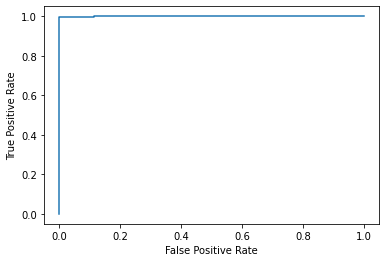

In [18]:
from sklearn.metrics import RocCurveDisplay

true_positive = np.ones((len(attack_errors),))
true_negative = np.zeros((len(normal_errors),))
true_labels = np.concatenate([true_positive, true_negative])

n_errors = np.array([normal_errors])
n_errors = np.squeeze(n_errors)

a_errors = np.array([attack_errors])
a_errors = np.squeeze(a_errors)

scores = np.concatenate([a_errors,n_errors])

fpr, tpr, thresholds = metrics.roc_curve(true_labels, scores, pos_label=1)
#roc_auc = metrics.auc(fpr, tpr)
# display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,estimator_name='example estimator')
# display.plot()  
# plt.show() 
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()


In [19]:
metrics.auc(fpr, tpr)

0.9996280691011286

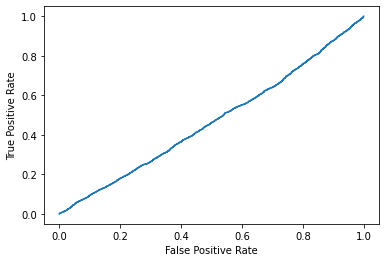

In [182]:
from sklearn.metrics import RocCurveDisplay

true_positive = np.ones((len(normal_errors),))
true_negative = np.zeros((len(attack_errors),))
true_labels = np.concatenate([true_positive, true_negative])

n_errors = np.array([normal_errors])
n_errors = np.squeeze(n_errors)

a_errors = np.array([attack_errors])
a_errors = np.squeeze(a_errors)

scores = np.concatenate([n_errors,a_errors])

fpr, tpr, thresholds = metrics.roc_curve(true_labels, scores, pos_label=1)
#roc_auc = metrics.auc(fpr, tpr)
# display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,estimator_name='example estimator')
# display.plot()  
# plt.show() 
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()


In [10]:
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
print("Threshold value is:", optimal_threshold)
v1 = optimal_threshold

Threshold value is: 0.009674379586963702


In [166]:
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
print("Threshold value is:", optimal_threshold)
v2 = optimal_threshold

Threshold value is: 0.006965136762859818


%AUC 3dCNN: 0.5314697888188242
%AUC 2d-cnn-lstm: 0.8272940758464862
%AUC timedist 2d cnn: 0.5447554595738933
%AUC biconvlstm: 0.5884773891013932
%AUC convLSTM: 0.5773926174310349
%AUC smallLSTM: 0.5070713996235989
%AUC cannoloLSTM: 0.5324733845194409

In [144]:
from keras.layers import Bidirectional

In [346]:
# Bidirectional on same shape as convlstm
input = Input(shape=(40 ,64,17,1))

x = Bidirectional(ConvLSTM2D(filters = 5, kernel_size = (11, 9),strides=(2, 2),return_sequences=True))(input)
x = Bidirectional(ConvLSTM2D(filters = 5, kernel_size = (9, 3),strides=(2, 2),return_sequences=True))(x)
x = Bidirectional(ConvLSTM2D(filters = 5, kernel_size = (3, 1),strides=(2, 1),return_sequences=True))(x)
x, state_h1, state_c1, state_h2, state_c2 = Bidirectional(ConvLSTM2D(filters = 5, kernel_size = (1, 1),strides=(1, 1),return_sequences=True,return_state=True))(x)
x = Bidirectional(ConvLSTM2D(filters = 5, kernel_size = (1, 1),strides=(1, 1),return_sequences=True))(x, initial_state = [state_h1, state_c1, state_h2, state_c2])

k1 = 40  - x.shape[1] + 1 
k2 = 64 - x.shape[2] + 1
k3 = 17 - x.shape[3] + 1 

x = Conv3DTranspose(1,kernel_size=(k1,k2,k3), strides=(1, 1, 1),activation='relu')(x) 
CNN = Model(inputs=input, outputs=x,name="CNN")
CNN.compile(optimizer='adam', loss='BinaryCrossentropy')
CNN.summary()

Model: "CNN"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            [(None, 40, 64, 17,  0                                            
__________________________________________________________________________________________________
bidirectional_14 (Bidirectional (None, 40, 27, 5, 10 23800       input_5[0][0]                    
__________________________________________________________________________________________________
bidirectional_15 (Bidirectional (None, 40, 10, 2, 10 16240       bidirectional_14[0][0]           
__________________________________________________________________________________________________
bidirectional_16 (Bidirectional (None, 40, 4, 2, 10) 1840        bidirectional_15[0][0]           
________________________________________________________________________________________________

In [14]:
import pandas as pd
import tensorflow as tf
import keras
import pickle
from keras.callbacks import EarlyStopping
import numpy as np
from cont_data_process import continuous_process
from prepare_data_cube_cont import make_cubes_cont
from prepare_LSTM_data import LSTM_data
from create_model import make_model

filename = 'gear_val.csv'
df = pd.read_csv(filename, sep=',')

In [15]:
df

Timestamp    ID Attack  Total Time  Packet Deltatime  bin0  bin1  \
0       1.478193e+09  018f      R  262.519333          0.000238     0     0   
1       1.478193e+09  0260      R  262.519564          0.000231     0     0   
2       1.478193e+09  02a0      R  262.519796          0.000232     0     0   
3       1.478193e+09  0329      R  262.520030          0.000234     0     0   
4       1.478193e+09  043f      T  262.520263          0.000233     0     0   
...              ...   ...    ...         ...               ...   ...   ...   
349995  1.478194e+09  01f1      R  446.697918          0.000247     0     0   
349996  1.478194e+09  0153      R  446.698156          0.000238     0     0   
349997  1.478194e+09  0002      R  446.698402          0.000246     0     0   
349998  1.478194e+09  043f      T  446.698637          0.000235     0     0   
349999  1.478194e+09  0545      R  446.698889          0.000252     0     0   

        bin2  bin3  bin4  ...  bin57  bin58  bin59  bin60  bin61  bin62  \
0          0     0     0  ...      0      0      0      0      0      0   
1          0     0     0  ...      0      1      0      1      0      1   
2          0     0     0  ...      0      0      0      0      0      0   
3          0     0     0  ...      0      0      1      0      1      0   
4          0     0     0  ...      0      0      0      0      0      0   
...      ...   ...   ...  ...    ...    ...    ...    ...    ...    ...   
349995     0     0     0  ...      0      0      0      0      0      0   
349996     0     0     0  ...      0      0      0      0      0      0   
349997     0     0     0  ...      0      0      1      0      1      0   
349998     0     0     0  ...      0      0      0      0      0      0   
349999     0     0     0  ...      0      0      0      0      0      0   

        bin63  Dataset  Attack Window Number  Normal Window Number  
0           0    valid                     1                     0  
1           0    valid                     1                     0  
2           0    valid                     1                     0  
3           0    valid                     1                     0  
4           0    valid                     1                     0  
...       ...      ...                   ...                   ...  
349995      0    valid                  4756                     0  
349996      0    valid                  4756                     0  
349997      0    valid                  4756                     0  
349998      0    valid                  4756                     0  
349999      0    valid                  4756                     0  

[350000 rows x 72 columns]

In [8]:
import pandas as pd
import tensorflow as tf
import keras
import pickle
from keras.callbacks import EarlyStopping
import numpy as np
from cont_data_process import continuous_process
from prepare_data_cube_cont import make_cubes_cont
from prepare_LSTM_data import LSTM_data
from create_model import make_model

#filename = 'dataframe_validation_attack.csv'
filename = 'gear_train.csv'
df = pd.read_csv(filename, sep=',')
allRows = df.shape[0]

IDs = df['ID']
attack = df[df['Attack'] == 'T'].copy()
attack_ind = attack.index

#dataValues = df.drop([ "ID", "Packet Deltatime", "Attack","Attack Window Number", "Normal Window Number"], axis = 1).copy()
dataValues  = df.drop([ "Timestamp","ID", "Packet Deltatime", "Attack","Attack Window Number", "Normal Window Number","Total Time","Dataset"], axis = 1).copy()

dataValues = dataValues.to_numpy() 
print(dataValues.shape)
n_steps = int(allRows/10000) # about 10k in each step #127 before
print(n_steps)
split = np.array_split(range(allRows), n_steps)

#type = 'cnn'
type = 'cnn_lstm'
#type = 'timeDist_cnn'
#type = 'lstm'
#modelname = '3dCNN_final'
#modelname = 'small_LSTM_final'
#modelname = 'cannolo_LSTM_final'
modelname = 'panic2dcnn'
#modelname = 'conv-lstm_gear_FINAL'
#modelname = 'timedist_2d_cnn_lstm_gear_FINAL'
#modelname = '3dCNN_gear_FINAL'
model =  keras.models.load_model(modelname)

all_attack_errors = []
all_normal_errors = []

for y in range(n_steps):
    print(f'{y} of {n_steps}')
    data_ind = split[y]
    
    #dfSlice = df.iloc[slice1:slice2,:].copy()
    #data, ID_vector,_ = continuous_process(dfSlice)

    t_IDs = IDs[data_ind]
    training_data = dataValues[data_ind,:]
    # LSTM:
    #x_val,samples = LSTM_data(training_data,40,data_ind)
  
    x_val,samples = make_cubes_cont(t_IDs,training_data,40,type,data_ind) 

    contains_attack = [np.any(np.in1d(x, attack_ind)) for x in samples]
    attack_samples = contains_attack
    no_attacks = ~np.array(contains_attack)
    
    #attack_cubes = x_val[attack_samples,:,:] 
    #x_normal = x_val[no_attacks,:,:]

    attack_cubes = x_val[attack_samples,:,:,:]
    x_normal = x_val[no_attacks,:,:,:]

    yHat_normal = model.predict(x_normal) # only normal packets
    normal_errors = x_normal-yHat_normal

    if type == 'timeDist_cnn' or type == 'cnn':
        normal_errors = normal_errors.reshape(normal_errors.shape[0],normal_errors.shape[1]*normal_errors.shape[2]*normal_errors.shape[3]*normal_errors.shape[4])

    if type == 'cnn_lstm':
        normal_errors = normal_errors.reshape(normal_errors.shape[0],normal_errors.shape[1]*normal_errors.shape[2]*normal_errors.shape[3])
    if type == 'lstm':
        normal_errors = normal_errors.reshape(normal_errors.shape[0],normal_errors.shape[1]*normal_errors.shape[2])

    normal_errors = np.abs(normal_errors)
    normal_errors = np.sum(normal_errors,axis=1)
    all_normal_errors.append(normal_errors)
    if attack_cubes.shape[0]!=0:
        yHat_attack = model.predict(attack_cubes) # only attack packets
        attack_errors = attack_cubes-yHat_attack
        if type == 'timeDist_cnn' or type =='cnn':
            attack_errors = attack_errors.reshape(attack_errors.shape[0],attack_errors.shape[1]*attack_errors.shape[2]*attack_errors.shape[3] *attack_errors.shape[4])

        if type == 'cnn_lstm':
            attack_errors = attack_errors.reshape(attack_errors.shape[0],attack_errors.shape[1]*attack_errors.shape[2]*attack_errors.shape[3])
        if type == 'lstm':
            attack_errors = attack_errors.reshape(attack_errors.shape[0],attack_errors.shape[1]*attack_errors.shape[2])

        attack_errors = np.abs(attack_errors)
        attack_errors = np.sum(attack_errors,axis=1)
    #x_train = LSTM_data(training_data,overlap)
    #x_val = LSTM_data(val_data,overlap)
        all_attack_errors.append(attack_errors)
 
 

f = open('normal_errors_panic2dcnn.pckl', 'wb')
pickle.dump(all_normal_errors, f)
f.close()


f = open('attack_errors_panic2dcnn.pckl', 'wb')
pickle.dump(all_attack_errors, f)
f.close()

(500000, 64)
50
0 of 50
x shape = (285, 64, 17, 40)
1 of 50
x shape = (285, 64, 17, 40)
2 of 50
x shape = (285, 64, 17, 40)
3 of 50
x shape = (285, 64, 17, 40)
4 of 50
x shape = (285, 64, 17, 40)
5 of 50
x shape = (285, 64, 17, 40)
6 of 50
x shape = (285, 64, 17, 40)
7 of 50
x shape = (285, 64, 17, 40)
8 of 50
x shape = (285, 64, 17, 40)
9 of 50
x shape = (285, 64, 17, 40)
10 of 50
x shape = (285, 64, 17, 40)
11 of 50
x shape = (285, 64, 17, 40)
12 of 50
x shape = (285, 64, 17, 40)
13 of 50
x shape = (285, 64, 17, 40)
14 of 50
x shape = (285, 64, 17, 40)
15 of 50
x shape = (285, 64, 17, 40)
16 of 50
x shape = (285, 64, 17, 40)
17 of 50
x shape = (285, 64, 17, 40)
18 of 50
x shape = (285, 64, 17, 40)
19 of 50
x shape = (285, 64, 17, 40)
20 of 50
x shape = (285, 64, 17, 40)
21 of 50
x shape = (285, 64, 17, 40)
22 of 50
x shape = (285, 64, 17, 40)
23 of 50
x shape = (285, 64, 17, 40)
24 of 50
x shape = (285, 64, 17, 40)
25 of 50
x shape = (285, 64, 17, 40)
26 of 50
x shape = (285, 64, 17,

In [11]:
import pandas as pd
import tensorflow as tf
from keras.callbacks import EarlyStopping
import numpy as np
from cont_data_process import continuous_process
from prepare_data_cube_cont import make_cubes_cont
from prepare_LSTM_data import LSTM_data
from create_model import make_model
# next will be timedist_bi_conv? or cnn_bi_lstm 

#training_filename = 'dataframe_training_new.csv'
training_filename = 'gear_train.csv'
training_df = pd.read_csv(training_filename, sep=',')
attack = training_df[training_df['Attack'] == 'T'].copy()
print(attack)
print(training_data_df.shape)
training_df.drop(attack.index, axis=0, inplace=True)
allRowsTraining = training_df.shape[0]

training_IDs = training_df['ID']
#training_dataValues = training_df.drop(["Timestamp", "ID", "DLC", "Attack Window Number", "Normal Window Number", "Data1", "Data2", "Data3", "Data4", "Data5", "Data6", "Data7", "Data8","Total Time", "Attack", "Packet Deltatime"], axis = 1).copy()
#training_dataValues = training_df.drop([ "ID", "Packet Deltatime", "Attack","Attack Window Number", "Normal Window Number","Total Time"], axis = 1).copy()
training_dataValues = training_df.drop([ "Timestamp","ID", "Packet Deltatime", "Attack","Attack Window Number", "Normal Window Number","Total Time","Dataset"], axis = 1).copy()

training_dataValues = training_dataValues.to_numpy() 

n_steps = int(allRowsTraining/10000) # about 10k in each step #127 before
print(n_steps)
training_split = np.array_split(range(allRowsTraining), n_steps)
 
#val_filename = 'dataframe_validation_normal_new.csv'
val_filename = 'gear_val.csv'
val_df = pd.read_csv(val_filename, sep=',')
attack_val = val_df[val_df['Attack'] == 'T'].copy()
val_df.drop(attack_val.index, axis=0, inplace=True)
allRowsVal = val_df.shape[0]

val_IDs = val_df['ID']
#val_dataValues = val_df.drop(["Timestamp", "ID", "DLC", "Attack Window Number", "Normal Window Number", "Data1", "Data2", "Data3", "Data4", "Data5", "Data6", "Data7", "Data8","Total Time", "Attack", "Packet Deltatime"], axis = 1).copy()
#val_dataValues = val_df.drop([ "ID", "Packet Deltatime", "Attack","Attack Window Number", "Normal Window Number","Total Time"], axis = 1).copy()
val_dataValues  = val_df.drop([ "Timestamp","ID", "Packet Deltatime", "Attack","Attack Window Number", "Normal Window Number","Total Time","Dataset"], axis = 1).copy()

val_dataValues = val_dataValues.to_numpy()

val_split = np.array_split(range(allRowsVal), n_steps)
 

           Timestamp    ID Attack  Total Time  Packet Deltatime  bin0  bin1  \
2140    1.478193e+09  043f      T    1.211640          0.005842     0     0   
2141    1.478193e+09  043f      T    1.212771          0.001131     0     0   
2142    1.478193e+09  043f      T    1.213910          0.001139     0     0   
2144    1.478193e+09  043f      T    1.215059          0.000707     0     0   
2150    1.478193e+09  043f      T    1.216892          0.000240     0     0   
...              ...   ...    ...         ...               ...   ...   ...   
499984  1.478193e+09  043f      T  262.512373          0.001158     0     0   
499986  1.478193e+09  043f      T  262.513530          0.000740     0     0   
499995  1.478193e+09  043f      T  262.516490          0.000233     0     0   
499996  1.478193e+09  043f      T  262.517094          0.000604     0     0   
499998  1.478193e+09  043f      T  262.518471          0.000231     0     0   

        bin2  bin3  bin4  ...  bin57  bin58  bin59 

NameError: name 'training_data_df' is not defined

In [1]:
import pandas as pd
import tensorflow as tf
import keras
import pickle
from keras.callbacks import EarlyStopping
import numpy as np
from cont_data_process import continuous_process
from prepare_data_cube_cont import make_cubes_cont
from prepare_LSTM_data import LSTM_data
from create_model import make_model

#filename = 'dataframe_test_attack.csv'
filename = 'gear_test.csv'
df = pd.read_csv(filename, sep=',')
allRows = df.shape[0]

IDs = df['ID']
IDs = np.array(IDs)
#IDs = IDs[:148400]
attack = df[df['Attack'] == 'T'].copy()
#attack = attack[:148400]
attack_ind = attack.index

#dataValues = df.drop([ "ID", "Packet Deltatime", "Attack","Attack Window Number", "Normal Window Number"], axis = 1).copy()
dataValues = df.drop([ "Timestamp","ID", "Packet Deltatime", "Attack","Attack Window Number", "Normal Window Number","Total Time","Dataset"], axis = 1).copy()

dataValues = dataValues.to_numpy() 
print(dataValues.shape)
#dataValues = dataValues[:148400]
n_steps = int(allRows/10000) # about 10k in each step #127 before
print(n_steps)
split = np.array_split(range(allRows), n_steps)

#type = 'cnn'
#type = 'lstm'
#modelname = '3dCNN_final'
#modelname = 'small_LSTM_final'
type = 'cnn_lstm'
modelname = 'panic2dcnn'

model =  keras.models.load_model(modelname)

all_attack_samples = []
errors = []

for y in range(n_steps):
    print(f'{y} of {n_steps}')
    data_ind = split[y]

    t_IDs = IDs[data_ind]
    training_data = dataValues[data_ind,:]
    x_val,samples = make_cubes_cont(t_IDs,training_data,40,type,data_ind) 
    
    contains_attack = [np.any(np.in1d(x, attack_ind)) for x in samples]
    attack_samples = contains_attack
    
   
    yHat_normal = model.predict(x_val) # only normal packets
    all_errors = x_val-yHat_normal

    if type == 'timeDist_cnn' or type == 'cnn':
        all_errors = all_errors.reshape(all_errors.shape[0],all_errors.shape[1]*all_errors.shape[2]*all_errors.shape[3]*all_errors.shape[4])

    if type == 'cnn_lstm':
        all_errors = all_errors.reshape(all_errors.shape[0],all_errors.shape[1]*all_errors.shape[2]*all_errors.shape[3])
    
    if type == 'lstm':
        all_errors = all_errors.reshape(all_errors.shape[0],all_errors.shape[1]*all_errors.shape[2])

    all_errors = np.abs(all_errors)
    all_errors = np.sum(all_errors,axis=1)
    errors.append(all_errors)
    
    all_attack_samples.append(attack_samples)
 
 
f = open('test_errors_panic2dcnn.pckl', 'wb')
pickle.dump(errors, f)
f.close()


f = open('all_attack_samples_panic2dcnntest.pckl', 'wb')
pickle.dump(all_attack_samples, f)
f.close()


(150000, 64)
15
0 of 15
x shape = (250, 64, 17, 40)
1 of 15
x shape = (250, 64, 17, 40)
2 of 15
x shape = (250, 64, 17, 40)
3 of 15
x shape = (250, 64, 17, 40)
4 of 15
x shape = (250, 64, 17, 40)
5 of 15
x shape = (250, 64, 17, 40)
6 of 15
x shape = (250, 64, 17, 40)
7 of 15
x shape = (250, 64, 17, 40)
8 of 15
x shape = (250, 64, 17, 40)
9 of 15
x shape = (250, 64, 17, 40)
10 of 15
x shape = (250, 64, 17, 40)
11 of 15
x shape = (250, 64, 17, 40)
12 of 15
x shape = (250, 64, 17, 40)
13 of 15
x shape = (250, 64, 17, 40)
14 of 15
x shape = (250, 64, 17, 40)
